<a href="https://colab.research.google.com/github/2022Group3/projectNotebooks/blob/main/without_categorical_with_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# baseline model with dropout and data augmentation on the cifar10 dataset
import numpy as np
import sys
import tensorflow as tf
from matplotlib import pyplot
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load train and test dataset
def load_dataset():
  data=np.load(r'drive/MyDrive/data_modified.npz')
  data=dict(zip(("{}".format(k) for k in data),(data[k] for k in data)))
  trainX=data['train']
  trainy=data['ytrain']
  validationX=data['validation']
  validationy=data['yvalidation']
  testX=data['test']
  testy=data['ytest']
  return trainX,trainy,validationX,validationy,testX,testy

In [ ]:
a,b,c,d,e,f=load_dataset()

In [ ]:
b.shape
b

array([6, 0, 9, ..., 7, 8, 4], dtype=int32)

In [ ]:
len(a)

45000

In [ ]:
a.shape

(45000, 32, 32, 3)

In [ ]:
# scale pixels
def prep_pixels(train,validation):
  # convert from integers to floats
  train_norm = train.astype('float32')
  validation_norm = validation.astype('float32')
  # normalize to range 0-1
  train_norm = train_norm / 255.0
  validation_norm = validation / 255.0
  # return normalized images
  return train_norm, validation_norm

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

    # list all data in history
    print(history.history.keys())

In [ ]:
# define cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(BatchNormalization())
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.3))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2,2)))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(28, activation='softmax'))
	# compile model
  opt = SGD(learning_rate=0.001, momentum=0.9)
  # model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  # model.compile(optimizer=opt,loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
  return model

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='validation')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='validation')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')



In [ ]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
  trainX, trainy,validationX,validationy, testX, testy = load_dataset()
	# prepare pixel data
  trainX, validationX = prep_pixels(trainX, validationX)
	# define model
  model = define_model()
	# create data generator
  datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	# prepare iterator
  it_train = datagen.flow(trainX, trainy, batch_size=64)
	# fit model
  steps = int(trainX.shape[0] / 64)
  history = model.fit(it_train, steps_per_epoch=steps, epochs=250, validation_data=(validationX, validationy), verbose=1)
	# evaluate model
  _, acc = model.evaluate(testX, testy, verbose=1)
  print('> %.3f' % (acc * 100.0))
	# learning curves
  summarize_diagnostics(history)
	#save model
  model.save('/content/drive/MyDrive/model2.h5')
  return model

Epoch 1/250
703/703 [==============================] - 36s 34ms/step - loss: 2.8622 - accuracy: 0.2416 - val_loss: 1.9587 - val_accuracy: 0.3825
Epoch 2/250
703/703 [==============================] - 23s 33ms/step - loss: 2.1599 - accuracy: 0.3445 - val_loss: 1.8186 - val_accuracy: 0.4208
Epoch 3/250
703/703 [==============================] - 25s 36ms/step - loss: 1.9485 - accuracy: 0.3873 - val_loss: 1.6977 - val_accuracy: 0.4405
Epoch 4/250
703/703 [==============================] - 24s 34ms/step - loss: 1.8107 - accuracy: 0.4155 - val_loss: 1.7268 - val_accuracy: 0.4511
Epoch 5/250
703/703 [==============================] - 24s 34ms/step - loss: 1.7314 - accuracy: 0.4392 - val_loss: 1.6069 - val_accuracy: 0.4760
Epoch 6/250
703/703 [==============================] - 26s 37ms/step - loss: 1.6588 - accuracy: 0.4560 - val_loss: 1.5534 - val_accuracy: 0.5013
Epoch 7/250
703/703 [==============================] - 24s 35ms/step - loss: 1.5940 - accuracy: 0.4735 - val_loss: 1.5538 - val_ac

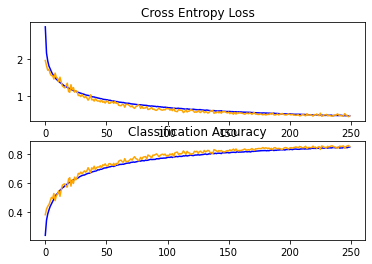

In [ ]:
# entry point, run the test harness
model=run_test_harness()

In [ ]:
def prep_pixels2(testX):
  # convert from integers to floats
  testX_norm = testX.astype('float32')
  # normalize to range 0-1
  testX_norm = testX_norm / 255.0
  
  # return normalized images
  return testX_norm

In [ ]:
_, acc = model.evaluate(prep_pixels2(e),f, verbose=1)


704/704 [==============================] - 3s 4ms/step - loss: 0.4755 - accuracy: 0.8492
